In [2]:
import pandas as pd
import numpy as np
import networkx as nx
from pyvis.network import Network 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
coconet_plants = ['grape','arabidopsis','soybean','medicago','tomato','potato','rice','brome','sorghum','maize']
full_annotated_group_list = pd.read_csv('/data/passala/Generated_Tables/Reference_tables/all_annotated_go_groups.csv',encoding = 'cp1252',index_col= 0)
full_annotated_group_list.head(5)

,Avg FC,Avg EGAD,Name,EGAD Counts,Annotation,Notes
GO:0000003,0.740324,0.634227,reproduction,10,None,NaN
GO:0000018,0.766573,0.798689,regulation of DNA recombination,8,None,NaN
GO:0000027,0.923946,0.869159,ribosomal large subunit assembly,9,Ribosomal,NaN
GO:0000028,0.951180,0.875073,ribosomal small subunit assembly,9,Ribosomal,NaN
GO:0000030,0.714718,0.642678,mannosyltransferase activity,8,None,Critical function in eukaryotes


In [4]:
def Jaccard_calculator(list1, list2):
    intersect = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersect
    return float(intersect / union)

In [5]:
alpha = ['a2','b2','c2','d2']
beta = ['a2','c2','d2']
Jaccard_calculator(alpha,beta)

0.75

In [6]:
def get_go_annotations_as_panda(species):
    import pandas as pd
    ## TAXA_ID to species_name
    if type(species) == int:
        mapper = pd.read_csv(
            '/home/passala/Gene_duplication_project/Generated_tables/Time_Savers/Species_name_resolver.csv'
        )
        species = mapper['Common Name'].loc[mapper['Taxa ID'] == species].item()

    ## Get file_location
    file_location = '/data/CoCoCoNet/gene2go/' + species + '_gene2go.csv'
    original_csv = pd.read_csv(file_location, sep=' ')
    if len(original_csv) == 0:
        raise NameError('No Annotations for this Species :(')
    original_csv = original_csv.dropna()
    original_csv['Present'] = 1
    matrixed_version = original_csv.pivot(index='NetworkIDs',
                                          columns='GO_term',
                                          values='Present')
    filled_matrixed_version = matrixed_version.fillna(value=0)
    return filled_matrixed_version

In [7]:
go_groups_of_interest = full_annotated_group_list.index.tolist()

In [8]:
full_annotated_group_list.sort_values(by = 'Annotation')

,Avg FC,Avg EGAD,Name,EGAD Counts,Annotation,Notes
GO:0080032,0.566563,0.775655,methyl jasmonate esterase activity,4,Hormonal,NaN
GO:0120178,0.612878,0.666248,steroid hormone biosynthetic process,8,Hormonal,NaN
GO:0010329,0.649334,0.785633,auxin efflux transmembrane transporter activity,5,Hormonal,NaN
GO:0010315,0.651178,0.789997,auxin efflux,5,Hormonal,NaN
GO:0005991,0.634146,0.780447,trehalose metabolic process,8,Hormonal,trehalose hormone?
...,...,...,...,...,...,...
GO:0010143,0.620090,0.878869,cutin biosynthetic process,5,Secondary Metabolism,NaN
GO:0016117,0.735740,0.849897,carotenoid biosynthetic process,8,Secondary Metabolism,NaN
GO:0019760,0.598273,0.783119,glucosinolate metabolic process,5,Secondary Metabolism,NaN
GO:0017001,0.636524,0.785127,antibiotic catabolic process,10,Secondary Metabolism,NaN


In [9]:
number_of_groups_with_annotations = full_annotated_group_list['Annotation'].value_counts().to_frame()

In [10]:
full_annotated_group_list['Annotation'].value_counts()

None                    2847
Ribosomal                 55
Hormonal                  42
Secondary Metabolism      40
Photosynthesis            27
Name: Annotation, dtype: int64

In [11]:
master_dictionary_of_annotations ={}
for plant_type in coconet_plants:
    current_species_annotation = get_go_annotations_as_panda(plant_type)
    current_species_annotation = current_species_annotation[current_species_annotation.columns.intersection(go_groups_of_interest)]
    master_dictionary_of_annotations[plant_type] = current_species_annotation


In [12]:
ribosomal_genes_of_interest = full_annotated_group_list[full_annotated_group_list['Annotation'] == 'Ribosomal'].index.tolist()

In [13]:
ribosomal_similarity_pd = pd.DataFrame(columns =ribosomal_genes_of_interest, index = ribosomal_genes_of_interest, data = np.nan)
ribosomal_similarity_pd

,GO:0000027,GO:0000028,GO:0000054,GO:0000055,GO:0000154,GO:0000313,GO:0000314,GO:0000315,GO:0000460,GO:0000462,...,GO:0042274,GO:0043022,GO:0043023,GO:0044391,GO:0070180,GO:0070181,GO:0070475,GO:0071428,GO:0140102,GO:1901259
GO:0000027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GO:0000028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GO:0000054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GO:0000055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GO:0000154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GO:0000313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GO:0000314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GO:0000315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GO:0000460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GO:0000462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
for index_group in ribosomal_genes_of_interest:
    index_group_list_of_genes =[]
    for plant_species in coconet_plants:
        current_plant_species_annotations = master_dictionary_of_annotations[plant_species]
        if index_group in current_plant_species_annotations.columns:
            current_species_genes_with_current_group_annotation = current_plant_species_annotations.loc[current_plant_species_annotations[index_group] == 1].index.tolist()
            index_group_list_of_genes.extend(current_species_genes_with_current_group_annotation)
    for column_group in ribosomal_genes_of_interest:
        column_group_list_of_genes = []
        for plant_species in coconet_plants:
            current_plant_species_annotations = master_dictionary_of_annotations[plant_species]
            if column_group in current_plant_species_annotations.columns:
                current_species_genes_with_current_group_annotation = current_plant_species_annotations.loc[current_plant_species_annotations[column_group]==1].index.tolist()
                column_group_list_of_genes.extend(current_species_genes_with_current_group_annotation)
        current_jaccard_index = Jaccard_calculator(index_group_list_of_genes,column_group_list_of_genes)
        ribosomal_similarity_pd.loc[index_group,column_group] = current_jaccard_index
        
        

In [15]:
ribosomal_similarity_pd_long = ribosomal_similarity_pd.reset_index()
long_ribosomal = pd.melt(ribosomal_similarity_pd_long,id_vars = 'index')
long_ribosomal = long_ribosomal[long_ribosomal['index'] != long_ribosomal['variable']]
long_ribosomal = long_ribosomal.rename(columns = {'index':'Source','variable':'Target'})
long_ribosomal['Type'] = 'Undirected'
long_ribosomal.head()


,Source,Target,value,Type
1,GO:0000028,GO:0000027,0.000000,Undirected
2,GO:0000054,GO:0000027,0.007862,Undirected
3,GO:0000055,GO:0000027,0.009242,Undirected
4,GO:0000154,GO:0000027,0.000000,Undirected
5,GO:0000313,GO:0000027,0.000000,Undirected


(0.0, 325.0)

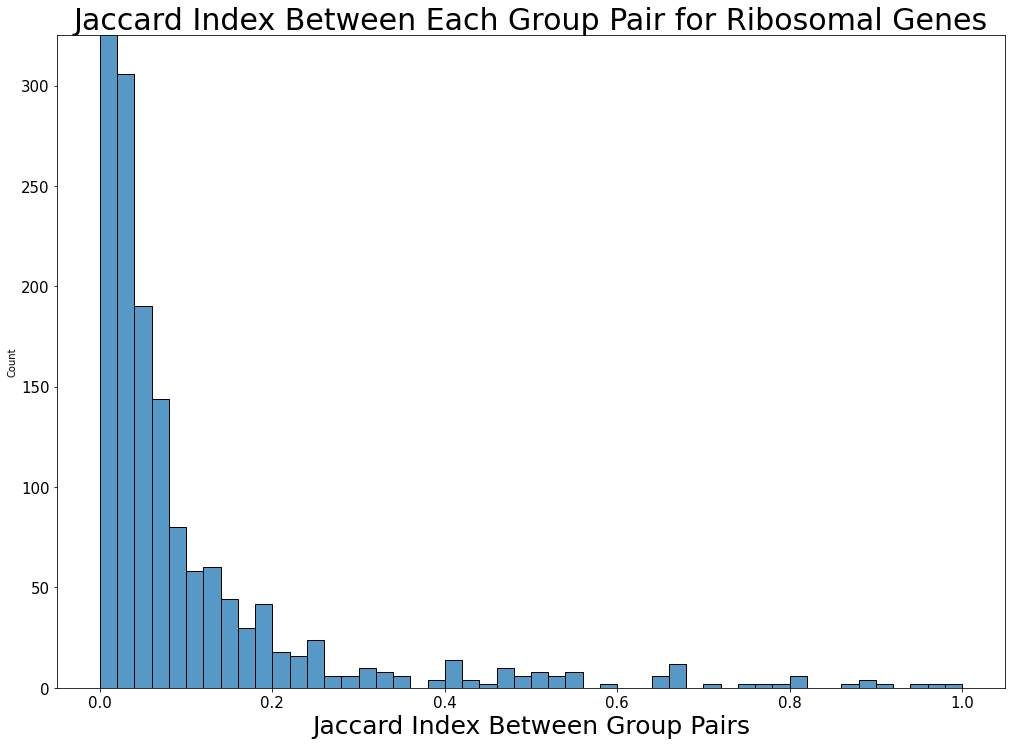

In [16]:
fig, ax = plt.subplots(figsize = (17,12))
sns.histplot(data = long_ribosomal, x = 'value',bins = 50)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Jaccard Index Between Group Pairs", fontsize = 25)
plt.title('Jaccard Index Between Each Group Pair for Ribosomal Genes',fontsize = 30)
plt.ylim([0,325])

In [17]:
long_ribosomal = long_ribosomal.loc[long_ribosomal['value']>0.1]

In [18]:
G = nx.from_pandas_edgelist(long_ribosomal,source = 'Source',target = 'Target',edge_attr= 'value')
net = Network(notebook=True)
net.from_nx(G)
net.show_buttons()
net.show('Ribosome.html')

In [19]:
terms_list = ['Ribosomal','Hormonal','Secondary Metabolism','Photosynthesis']

In [20]:
# fig, axs = plt.subplots(2,2,sharex = True, sharey = True,figsize = (25,15))
# fig.suptitle('Jaccard Index Between Each Group Pair within Groups for Annotated Genes, Trimmed Axis',fontsize = 30,fontweight = 'bold')
# for (ax_number,target_genes) in zip(axs.flat,terms_list):
#     current_genes_of_interest = full_annotated_group_list[full_annotated_group_list['Annotation'] == target_genes].index.tolist()
#     current_similarity_pd = pd.DataFrame(columns =current_genes_of_interest, index = current_genes_of_interest, data = np.nan)
#     for index_group in current_genes_of_interest:
#         index_group_list_of_genes =[]
#         for plant_species in coconet_plants:
#             current_plant_species_annotations = master_dictionary_of_annotations[plant_species]
#             if index_group in current_plant_species_annotations.columns:
#                 current_species_genes_with_current_group_annotation = current_plant_species_annotations.loc[current_plant_species_annotations[index_group] == 1].index.tolist()
#                 index_group_list_of_genes.extend(current_species_genes_with_current_group_annotation)
#         for column_group in current_genes_of_interest:
#             column_group_list_of_genes = []
#             for plant_species in coconet_plants:
#                 current_plant_species_annotations = master_dictionary_of_annotations[plant_species]
#                 if column_group in current_plant_species_annotations.columns:
#                     current_species_genes_with_current_group_annotation = current_plant_species_annotations.loc[current_plant_species_annotations[column_group]==1].index.tolist()
#                     column_group_list_of_genes.extend(current_species_genes_with_current_group_annotation)
#             current_jaccard_index = Jaccard_calculator(index_group_list_of_genes,column_group_list_of_genes)
#             current_similarity_pd.loc[index_group,column_group] = current_jaccard_index

#     current_similarity_pd_long = current_similarity_pd.reset_index()
#     long_current = pd.melt(current_similarity_pd_long,id_vars = 'index')
#     long_current = long_current[long_current['index'] != long_current['variable']]
#     long_current = long_current.rename(columns = {'index':'Source','variable':'Target'})
#     long_current['Type'] = 'Undirected'
#     sns.histplot(ax = ax_number,data = long_current, x = 'value',bins = 50)
#     ax_number.set_xlabel('Jaccard Index Between Each Group Pair',fontsize = 15)
#     ax_number.set_ylabel('Count',fontsize = 15)
#     ax_number.set_title('Gene Pairs in the {} Group'.format(target_genes), fontsize = 20)
#     ax_number.set_ylim([0,325])
    #plt.savefig('/home/passala/Gene_duplication_project/Code/Whole_genome_comparison_code/Figures/Annotated_groups_shared_genes_small_y_axis.png',transparent = False)

In [21]:
long_ribosomal.to_csv('/home/passala/Gene_duplication_project/Code/Whole_genome_comparison_code/Generated_tables_minor_use/ribosomal_network.csv',index = False)

In [22]:
long_ribosomal

,Source,Target,value,Type
23,GO:0015934,GO:0000027,0.167217,Undirected
28,GO:0019843,GO:0000027,0.155080,Undirected
29,GO:0022625,GO:0000027,0.187003,Undirected
30,GO:0022626,GO:0000027,0.113724,Undirected
42,GO:0042254,GO:0000027,0.125318,Undirected
...,...,...,...,...
2907,GO:0043023,GO:0071428,0.156997,Undirected
2919,GO:0000154,GO:0140102,0.454000,Undirected
2937,GO:0008649,GO:0140102,0.816547,Undirected
2953,GO:0031167,GO:0140102,0.665689,Undirected


In [23]:
master_dictionary_of_networks = {}
for target_genes in terms_list:
    current_genes_of_interest = full_annotated_group_list[full_annotated_group_list['Annotation'] == target_genes].index.tolist()
    current_similarity_pd = pd.DataFrame(columns =current_genes_of_interest, index = current_genes_of_interest, data = np.nan)
    for index_group in current_genes_of_interest:
        index_group_list_of_genes =[]
        for plant_species in coconet_plants:
            current_plant_species_annotations = master_dictionary_of_annotations[plant_species]
            if index_group in current_plant_species_annotations.columns:
                current_species_genes_with_current_group_annotation = current_plant_species_annotations.loc[current_plant_species_annotations[index_group] == 1].index.tolist()
                index_group_list_of_genes.extend(current_species_genes_with_current_group_annotation)
        for column_group in current_genes_of_interest:
            column_group_list_of_genes = []
            for plant_species in coconet_plants:
                current_plant_species_annotations = master_dictionary_of_annotations[plant_species]
                if column_group in current_plant_species_annotations.columns:
                    current_species_genes_with_current_group_annotation = current_plant_species_annotations.loc[current_plant_species_annotations[column_group]==1].index.tolist()
                    column_group_list_of_genes.extend(current_species_genes_with_current_group_annotation)
            current_jaccard_index = Jaccard_calculator(index_group_list_of_genes,column_group_list_of_genes)
            current_similarity_pd.loc[index_group,column_group] = current_jaccard_index

    current_similarity_pd_long = current_similarity_pd.reset_index()
    long_current = pd.melt(current_similarity_pd_long,id_vars = 'index')
    long_current = long_current[long_current['index'] != long_current['variable']]
    long_current = long_current.rename(columns = {'index':'Source','variable':'Target'})
    long_current['Type'] = 'Undirected'
    master_dictionary_of_networks[target_genes] = long_current
    

In [24]:
master_dictionary_of_networks['Photosynthesis']

,Source,Target,value,Type
1,GO:0009521,GO:0009507,0.035265,Undirected
2,GO:0009522,GO:0009507,0.021040,Undirected
3,GO:0009523,GO:0009507,0.029067,Undirected
4,GO:0009534,GO:0009507,0.167291,Undirected
5,GO:0009535,GO:0009507,0.137202,Undirected
...,...,...,...,...
723,GO:0034357,GO:0055035,0.839738,Undirected
724,GO:0042548,GO:0055035,0.035613,Undirected
725,GO:0042644,GO:0055035,0.007323,Undirected
726,GO:0042646,GO:0055035,0.011042,Undirected


In [61]:
long_photosynthesis = master_dictionary_of_networks['Photosynthesis'].loc[master_dictionary_of_networks['Photosynthesis']['value']>0.1]

In [40]:
long_hormonal = master_dictionary_of_networks['Hormonal'].loc[master_dictionary_of_networks['Hormonal']['value']>0.15]

In [ ]:
long_hormonal = master_dictionary_of_networks['Hormonal'].loc[master_dictionary_of_networks['Hormonal']['value']>0.15]


In [64]:
long_ribosomal = master_dictionary_of_networks['Ribosomal'].loc[master_dictionary_of_networks['Ribosomal']['value']>0.15]


In [68]:
G = nx.from_pandas_edgelist(long_ribosomal,source = 'Source',target = 'Target',edge_attr= 'value')
net = Network(notebook=True)
net.from_nx(G)
net.set_options('''
var options = {
  "nodes": {
    "color": {
      "border": "rgba(143,11,233,1)",
      "background": "rgba(177,114,252,1)"
    },
    "font": {
      "size": 18,
      "face": "tahoma",
      "strokeWidth": 3
    }
  },
  "edges": {
    "color": {
      "color": "rgba(140,17,201,1)",
      "highlight": "rgba(123,7,226,1)",
      "inherit": false
    },
    "smooth": false
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -2500,
      "springLength": 150
    },
    "minVelocity": 0.75
  }
}
''')
#net.show_buttons()
net.show('Ribosome.html')

In [54]:
long_photosynthesis

,Source,Target,value,Type
1,GO:0009521,GO:0009507,0.000000,Undirected
2,GO:0009522,GO:0009507,0.000000,Undirected
3,GO:0009523,GO:0009507,0.000000,Undirected
4,GO:0009534,GO:0009507,0.000000,Undirected
5,GO:0009535,GO:0009507,0.000000,Undirected
...,...,...,...,...
723,GO:0034357,GO:0055035,0.839738,Undirected
724,GO:0042548,GO:0055035,0.000000,Undirected
725,GO:0042644,GO:0055035,0.000000,Undirected
726,GO:0042646,GO:0055035,0.000000,Undirected


In [28]:
long_secondary = master_dictionary_of_networks['Secondary Metabolism'].loc[master_dictionary_of_networks['Secondary Metabolism']['value']>0.1]

In [62]:
G = nx.from_pandas_edgelist(long_photosynthesis,source = 'Source',target = 'Target',edge_attr= 'value',)
net = Network(notebook=True)
net.from_nx(G)
net.set_options('''var options = {
  "nodes": {
    "color": {
      "border": "rgba(0,255,32,1)",
      "background": "rgba(26,239,0,1)"
    },
    "font": {
      "size": 19,
      "face": "tahoma",
      "strokeWidth": 3
    }
  },
  "edges": {
    "color": {
      "color": "rgba(0,114,0,0.97)",
      "highlight": "rgba(0,140,21,1)",
      "inherit": false
    },
    "scaling": {
      "min": 0,
      "max": 9
    },
    "smooth": false
  },
  "physics": {
    "barnesHut": {
      "springLength": 180,
      "springConstant": 0.03
    },
    "minVelocity": 0.75
  }
}
''')
#net.show_buttons()
net.show('photosynthesis.html')

In [67]:
G = nx.from_pandas_edgelist(long_secondary,source = 'Source',target = 'Target',edge_attr= 'value')
net = Network(notebook=True)
net.from_nx(G)
net.set_options('''
var options = {
  "nodes": {
    "color": {
      "border": "rgba(233,13,47,1)",
      "background": "rgba(252,135,144,1)"
    },
    "font": {
      "size": 18,
      "face": "tahoma",
      "strokeWidth": 4
    }
  },
  "edges": {
    "color": {
      "color": "rgba(150,50,36,1)",
      "highlight": "rgba(198,64,52,1)",
      "inherit": false
    },
    "smooth": false
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -15650,
      "centralGravity": 1.35,
      "springLength": 165,
      "springConstant": 0.025
    },
    "minVelocity": 0.75
  }
}''')
#net.show_buttons()
net.show('secondary.html')

In [41]:
G = nx.from_pandas_edgelist(long_hormonal,source = 'Source',target = 'Target',edge_attr= 'value')
net = Network(notebook=True)
net.from_nx(G)
net.set_options('''var options = {
  "nodes": {
    "font": {
      "size": 18,
      "face": "tahoma",
      "strokeWidth": 4
    }
  },
  "edges": {
    "color": {
      "inherit": true
    },
    "smooth": false
  },
  "physics": {
    "minVelocity": 0.75
  }
}
''')
#net.show_buttons()
net.show('hormonal.html')

In [32]:
long_photosynthesis['Source'].nunique()


25

In [33]:
number_of_groups_with_annotations.drop(index = 'None',inplace = True)

In [34]:
number_of_groups_with_annotations

,Annotation
Ribosomal,55
Hormonal,42
Secondary Metabolism,40
Photosynthesis,27


In [35]:
number_of_groups_with_annotations['Jaccard Over .1'] = [52,38,36,25]

In [36]:
number_of_groups_with_annotations['% With a Jaccard Over .1 With at Least 1 Other Group'] = number_of_groups_with_annotations['Jaccard Over .1']/number_of_groups_with_annotations['Annotation']

In [37]:
number_of_groups_with_annotations = number_of_groups_with_annotations.reset_index()
number_of_groups_with_annotations.rename(columns = {'index':'Group Annotation','Annotation':'Total Genes in Group'},inplace = True)
number_of_groups_with_annotations

,Group Annotation,Total Genes in Group,Jaccard Over .1,% With a Jaccard Over .1 With at Least 1 Other Group
0,Ribosomal,55,52,0.945455
1,Hormonal,42,38,0.904762
2,Secondary Metabolism,40,36,0.900000
3,Photosynthesis,27,25,0.925926


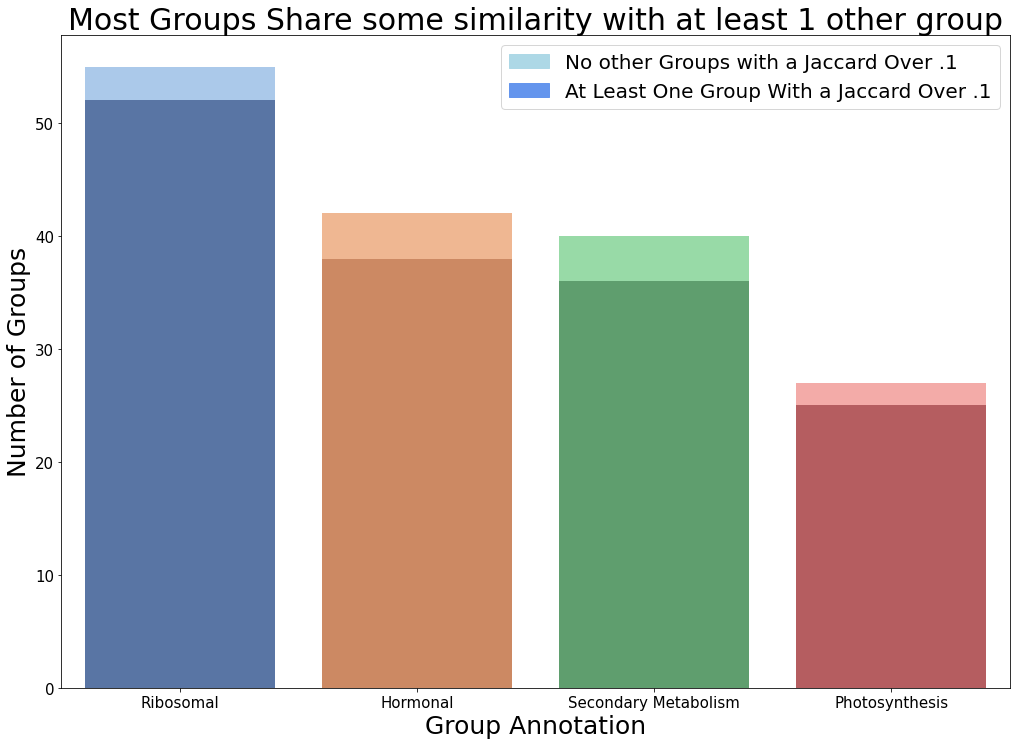

In [38]:
fig, ax = plt.subplots(figsize = (17,12))

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x='Group Annotation',  y="Total Genes in Group", data=number_of_groups_with_annotations,palette = 'pastel')


# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="Group Annotation", y="Jaccard Over .1", data=number_of_groups_with_annotations,palette = 'deep')

# add legend
top_bar = mpatches.Patch(color = 'lightblue', label='No other Groups with a Jaccard Over .1')
bottom_bar = mpatches.Patch(color='cornflowerblue', label='At Least One Group With a Jaccard Over .1')
plt.legend(handles=[top_bar, bottom_bar],fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Group Annotation", fontsize = 25)
plt.ylabel('Number of Groups',fontsize = 25)
plt.title('Most Groups Share some similarity with at least 1 other group',fontsize = 30)
plt.savefig('/home/passala/Gene_duplication_project/Code/Whole_genome_comparison_code/Figures/shared_genes_stacked.png')
# show the graph
plt.show()
